In [2]:
# newtons_method.py
"""Volume 1: Newton's Method.
Nathan Schill
Section 2
Tues. Feb. 7, 2023
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sy

In [3]:
# Problems 1, 3, and 5
def newton(f, x0, Df, tol=1e-5, maxiter=15, alpha=1.):
    """Use Newton's method to approximate a zero of the function f.

    Parameters:
        f (function): a function from R^n to R^n (assume n=1 until Problem 5).
        x0 (float or ndarray): The initial guess for the zero of f.
        Df (function): The derivative of f, a function from R^n to R^(nxn).
        tol (float): Convergence tolerance. The function should returns when
            the difference between successive approximations is less than tol.
        maxiter (int): The maximum number of iterations to compute.
        alpha (float): Backtracking scalar (Problem 3).

    Returns:
        (float or ndarray): The approximation for a zero of f.
        (bool): Whether or not Newton's method converged.
        (int): The number of iterations computed.
    """

    # Assume failure to converge unless tolerance is reached
    converged = False

    # If f: R -> R
    if np.isscalar(x0):
        
        # Iterate at most N times
        for k in range(maxiter):
            
            # Compute the next iteration
            x1 = x0 - alpha*f(x0)/Df(x0)
            
            # Check for convergence
            if np.abs(x1 - x0) < tol:
                # Upon convergence, stop iterating
                converged = True
                break

            # Otherwise, update the guess for the next iteration
            x0 = x1
        
        return x1, converged, k
    
    # Else, f: R^n -> R^n
    else:
        # Iterate at most N times
        for k in range(maxiter):

            # Solve Df(xk)yk = f(xk) for y
            y = np.linalg.solve(Df(x0), f(x0))
            
            # Compute the next iteration
            x1 = x0 - alpha*y
            
            # Check for convergence with 2-norm
            if np.linalg.norm(x1 - x0) < tol:
                # Upon convergence, stop iterating
                converged = True
                break

            # Otherwise, update the guess for the next iteration
            x0 = x1
        
        return x1, converged, k


# newton(lambda x: x/2, 10, lambda x: 1/2, maxiter=8)
# print(newton(lambda x: np.exp(x)-2, 2, lambda x: np.exp(x)))
# optimize.newton(lambda x: np.exp(x)-2, 2, lambda x: np.exp(x))

# Test alpha
# newton(lambda x: np.sign(x) * np.power(np.abs(x), 1./3), 0.01, lambda x: 1/3 * np.power(np.abs(x), -2./3), alpha=0.4)

# Test multivariate
def f(input):
    '''f: R2 -> R2, f(x,y) = (x**2 + y**2 - 1, y)'''

    # Input should be ndarray
    x, y = input
    return np.array([x**2 + y**2 - 1, y])

def Df(input):
    x, y = input

    return np.array([[2*x, 2*y], [0, 1]])

newton(f, np.array([1,2]), Df)

(array([1., 0.]), True, 6)

In [4]:
# Problem 2
def prob2(N1, N2, P1, P2):
    """Use Newton's method to solve for the constant r that satisfies

                P1[(1+r)**N1 - 1] = P2[1 - (1+r)**(-N2)].

    Use r_0 = 0.1 for the initial guess.

    Parameters:
        P1 (float): Amount of money deposited into account at the beginning of
            years 1, 2, ..., N1.
        P2 (float): Amount of money withdrawn at the beginning of years N1+1,
            N1+2, ..., N1+N2.
        N1 (int): Number of years money is deposited.
        N2 (int): Number of years money is withdrawn.

    Returns:
        (float): the value of r that satisfies the equation.
    """

    # Define initial guess, f, Df
    x0 = 0.1
    f = lambda r: P1*((1+r)**N1 - 1) - P2*(1 - (1+r)**(-N2))
    Df = lambda r: P1*N1*(1+r)**(N1-1) - P2*N2*(1+r)**(-N2-1)

    # Return Newton's method on f
    return newton(f, x0, Df, maxiter=100)[0]

prob2(30, 20, 2000, 8000)

0.03877843223027751

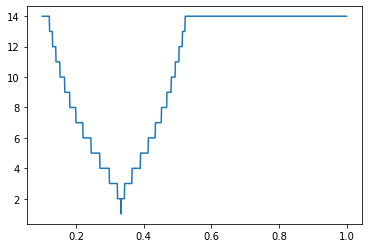

0.333

In [20]:
# Problem 4
def optimal_alpha(f, x0, Df, tol=1e-5, maxiter=15):
    """Run Newton's method for various values of alpha in (0,1].
    Plot the alpha value against the number of iterations until convergence.

    Parameters:
        f (function): a function from R^n to R^n (assume n=1 until Problem 5).
        x0 (float or ndarray): The initial guess for the zero of f.
        Df (function): The derivative of f, a function from R^n to R^(nxn).
        tol (float): Convergence tolerance. The function should returns when
            the difference between successive approximations is less than tol.
        maxiter (int): The maximum number of iterations to compute.

    Returns:
        (float): a value for alpha that results in the lowest number of
            iterations.
    """
    
    # Get alpha values at the specified distance apart
    space = 0.001
    A = np.linspace(0.1, 1, int((1-0.1)/space + 1))

    # Get number of iterations of each a
    num_iters = [None] * len(A)
    for i, a in enumerate(A):
        num_iters[i] = newton(f, 0.01, Df, alpha=a)[2]

    # Plot
    plt.plot(A, num_iters)
    plt.show()
    
    # Get value of alpha that yielded lowest number of iterations,
    # defaulting to the lower alpha in case of a tie
    return A[np.argmin(num_iters)]

# Define f and Df
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
Df = lambda x: 1/3 * np.power(np.abs(x), -2./3)

optimal_alpha(f, 0.01, Df)

In [6]:
c, d = 5, 1
x, y = sy.symbols('x y')
expr = sy.Matrix([c*x*y - x*(1+y), -x*y + (d-y)*(1+y)])
expr.jacobian((x,y))

Matrix([
[4*y - 1,      4*x],
[     -y, -x - 2*y]])

In [37]:
# Problem 6
def prob6():
    """Consider the following Bioremediation system.

                              5xy − x(1 + y) = 0
                        −xy + (1 − y)(1 + y) = 0

    Find an initial point such that Newton’s method converges to either
    (0,1) or (0,−1) with alpha = 1, and to (3.75, .25) with alpha = 0.55.
    Return the intial point as a 1-D NumPy array with 2 entries.
    """
    
    # Define gamma, delta, tol, maxiter
    c, d = 5, 1
    
    # Define f and Df
    def f(input):
        '''f: R2 -> R2, f(x,y) = ( c*x*y - x*(1+y),
                                   -x*y + (d-y)*(1+y) )'''

        # Input should be ndarray
        x, y = input
        return np.array([c*x*y - x*(1+y),
                         -x*y + (d-y)*(1+y)])

    def Df(input):
        '''Df: R2 -> B(R2)'''

        # Input should be ndarray
        x, y = input
        return np.array([[c*y - (1+y),          c*x - x],
                         [-y,          -x + d - 1 - 2*y]])
    
    # Define alpha values
    A = (0.55, 1)

    # Iterate through points
    num_pts_each_dir = 300
    pts = [(i, j) for i in np.linspace(0, -1/4, num_pts_each_dir) for j in np.linspace(0, 1/4, num_pts_each_dir)]

    for pt in pts:
        # Get results from Newton's method for both alpha values (skip any errors from non-invertible derivative matrices)
        results = [None] * 2
        for i, a in enumerate(A):
            try:
                results[i] = newton(f, pt, Df, alpha=a)
            except np.linalg.LinAlgError:
                pass
        
        # Verify the results are None (which would result from a non-invertible derivative matrix)
        if results[0] is not None and results[1] is not None:
            # Check if the value converged to the expected zero for the corresponding alpha
            if np.allclose(results[0][0], (3.75, 0.25)) and\
               (np.allclose(results[1][0], (0,1)) or np.allclose(results[1][0], (0,-1))):
                # Found point; return it
                return np.array(pt)
    
    return 'Not found'

# Define gamma, delta, tol, maxiter
c, d = 5, 1
tol = 1e-5

# Define f and Df
def f(input):
    '''f: R2 -> R2, f(x,y) = ( c*x*y - x*(1+y),
                                -x*y + (d-y)*(1+y) )'''

    # Input should be ndarray
    x, y = input
    return np.array([c*x*y - x*(1+y),
                        -x*y + (d-y)*(1+y)])

def Df(input):
    '''Df: R2 -> B(R2)'''

    # Input should be ndarray
    x, y = input
    return np.array([[c*y - (1+y),          c*x - x],
                        [-y,          -x + d - 1 - 2*y]])

x0 = prob6()
x0

# newton(f, x0, Df, tol=tol, alpha=0.55), newton(f, x0, Df, tol=tol, alpha=1)

array([-0.00501672,  0.24916388])

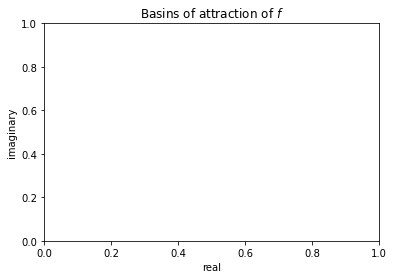

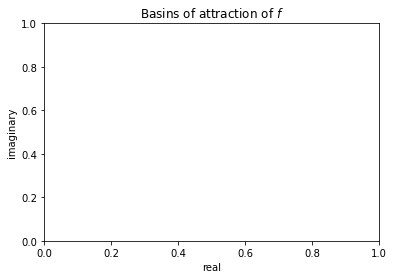

In [8]:
# Problem 7
def plot_basins(f, Df, zeros, domain, res=1000, iters=15):
    """Plot the basins of attraction of f on the complex plane.

    Parameters:
        f (function): A function from C to C.
        Df (function): The derivative of f, a function from C to C.
        zeros (ndarray): A 1-D array of the zeros of f.
        domain ([r_min, r_max, i_min, i_max]): A list of scalars that define
            the window limits and grid domain for the plot.
        res (int): A scalar that determines the resolution of the plot.
            The visualized grid has shape (res, res).
        iters (int): The exact number of times to iterate Newton's method.
    """
    # Unpack interval bounds
    rmin, rmax, imin, imax = domain

    # Real parts
    x_real = np.linspace(rmin, rmax, res)

    # Imaginary parts
    x_imag = np.linspace(imin, imax, res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)

    # Combine real and imaginary parts
    X_0 = X_real + 1j*X_imag

    # Create tmp to keep X_0
    X_tmp = X_0

    # Iterate through Newton's method iters times for every element in X_tmp
    for _ in range(iters):
        X_tmp = X_tmp - f(X_tmp)/Df(X_tmp)
    
    # Compute absolute distance from X_tmp to each zero
    Yzeros = [np.abs(X_tmp - zero) for zero in zeros]
    
    # Get index of zero that has the min absolute distance
    Y = np.argmin(Yzeros, axis=0)
    
    # Plot properties
    plt.title('Basins of attraction of $f$')
    plt.xlabel('real')
    plt.ylabel('imaginary')
    plt.show()
    
### f(x) = x^3 - 1
f = lambda x: x**3 - 1
Df = lambda x: 3*x**2

zeros = (1,
        -1/2 + 1j * 3**(1/2) / 2,
        -1/2 - 1j * 3**(1/2) / 2)
domain = (-1.5, 1.5, -1.5, 1.5)
plot_basins(f, Df, zeros, domain)

### f(x) = x^3 - x
f = lambda x: x**3 - x
Df = lambda x: 3*x**2 - 1

zeros = (-1, 0, 1)
domain = (-1.5, 1.5, -1.5, 1.5)
plot_basins(f, Df, zeros, domain)